Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading Dataset

In [2]:
df = pd.read_csv("C:/Users/shivang/OneDrive/Desktop/Internship_project/world_risk_index.csv")

Converting our datetime column 

In [3]:
pd.to_datetime(df['Year'],format="%Y")

0      2011-01-01
1      2011-01-01
2      2011-01-01
3      2011-01-01
4      2011-01-01
          ...    
1912   2016-01-01
1913   2016-01-01
1914   2016-01-01
1915   2016-01-01
1916   2016-01-01
Name: Year, Length: 1917, dtype: datetime64[ns]

Shape of Dataset

In [4]:
df.shape

(1917, 12)

Information of columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1917 entries, 0 to 1916
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Region                        1917 non-null   object 
 1   WRI                           1917 non-null   float64
 2   Exposure                      1917 non-null   float64
 3   Vulnerability                 1917 non-null   float64
 4   Susceptibility                1917 non-null   float64
 5   Lack of Coping Capabilities   1917 non-null   float64
 6    Lack of Adaptive Capacities  1916 non-null   float64
 7   Year                          1917 non-null   int64  
 8   Exposure Category             1917 non-null   object 
 9   WRI Category                  1916 non-null   object 
 10  Vulnerability Category        1913 non-null   object 
 11  Susceptibility Category       1917 non-null   object 
dtypes: float64(6), int64(1), object(5)
memory usage: 179.8+ KB


Checking null values

In [6]:
df.isnull().sum()

Region                          0
WRI                             0
Exposure                        0
Vulnerability                   0
Susceptibility                  0
Lack of Coping Capabilities     0
 Lack of Adaptive Capacities    1
Year                            0
Exposure Category               0
WRI Category                    1
Vulnerability Category          4
Susceptibility Category         0
dtype: int64

Handling null values

In [7]:
df['WRI Category'].ffill(inplace=True)
df[' Lack of Adaptive Capacities'].fillna(df[' Lack of Adaptive Capacities'].median(),inplace=True)
df['Vulnerability Category'].ffill(inplace=True)

C:\Users\shivang\AppData\Local\Temp\ipykernel_23688\67256802.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['WRI Category'].ffill(inplace=True)
C:\Users\shivang\AppData\Local\Temp\ipykernel_23688\67256802.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when

Droping duplicates if any

In [8]:
df.drop_duplicates(inplace=True)

Mathematical profile of our numerical columns

In [9]:
df.describe()

,WRI,Exposure,Vulnerability,Susceptibility,Lack of Coping Capabilities,Lack of Adaptive Capacities,Year
count,1917.000000,1917.000000,1917.000000,1917.000000,1917.000000,1917.000000,1917.000000
mean,7.551763,15.388336,48.075759,30.739431,70.438289,43.090506,2016.049557
std,5.553257,10.240135,13.835666,15.667030,15.038854,13.547619,3.182045
min,0.020000,0.050000,14.310000,8.260000,31.590000,11.160000,2011.000000
25%,3.740000,10.160000,37.040000,17.790000,59.330000,33.200000,2013.000000
50%,6.520000,12.760000,47.100000,25.400000,74.230000,43.080000,2016.000000
75%,9.400000,16.450000,60.060000,42.640000,83.000000,53.060000,2019.000000
max,56.710000,99.880000,76.470000,70.830000,94.360000,76.110000,2021.000000


Identifying for Skewness. In the first graph it shows that very few Countries have High WRI counts because some other factors responsible for that high value its a valid skewness factor and not neded to be treated by any method.

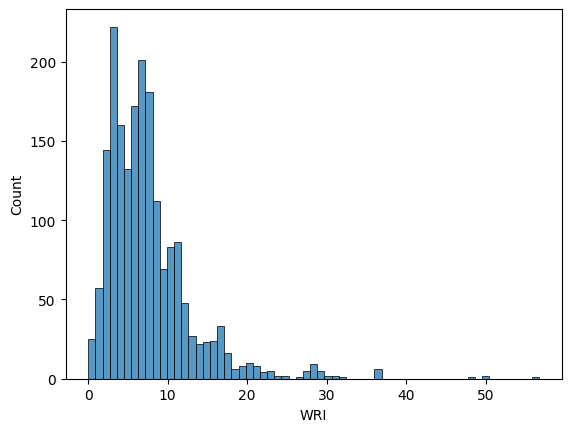

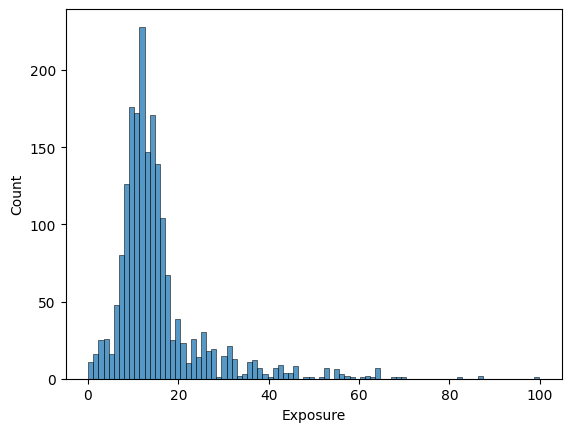

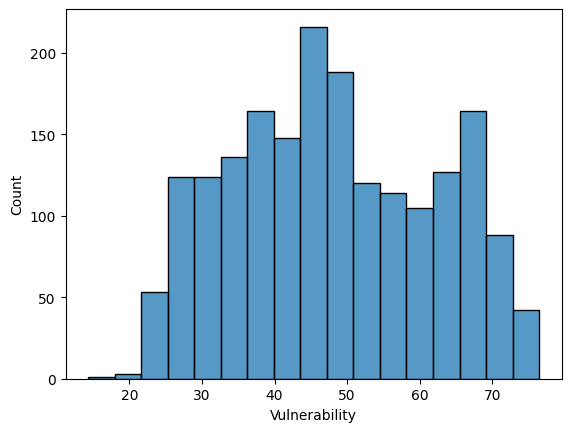

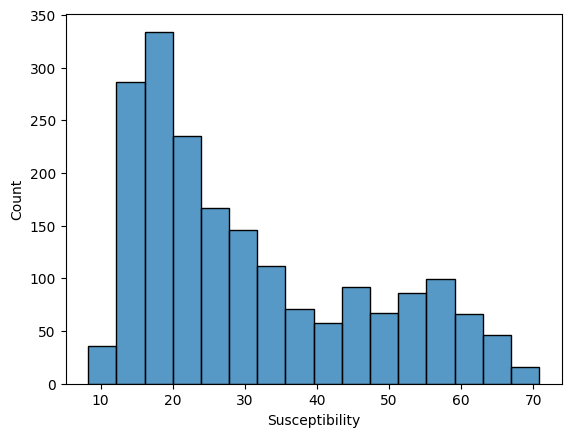

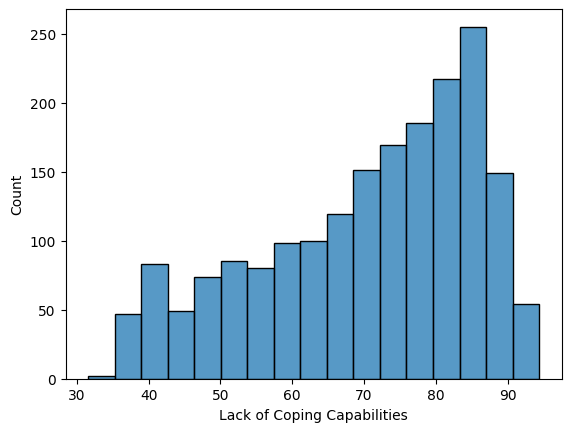

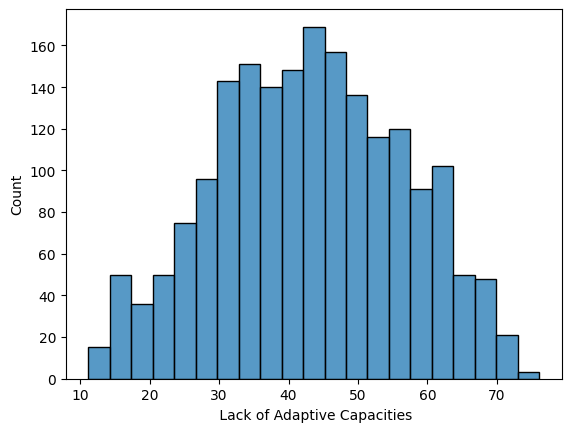

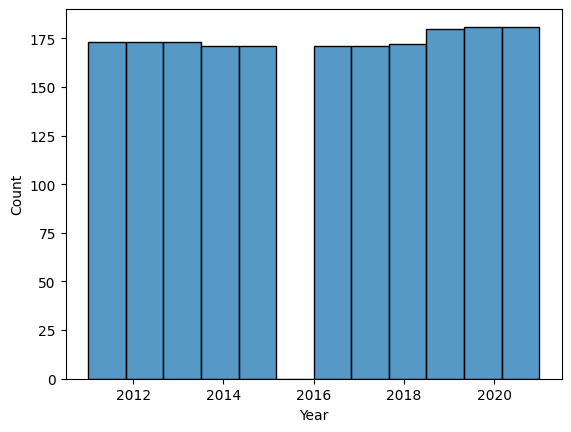

In [10]:
for i in df.select_dtypes(include='number').columns:
    sns.histplot(data=df,x=i,)
    plt.show()

#The data in Box plot of WRI  is right skewwed but this is valid and not a outlier because the values like exposure is high also and Lack of exposure is also high and categories of WRI and exposure is also high which is cause for these high values which are acting as a outliers and not be treated as outlier.


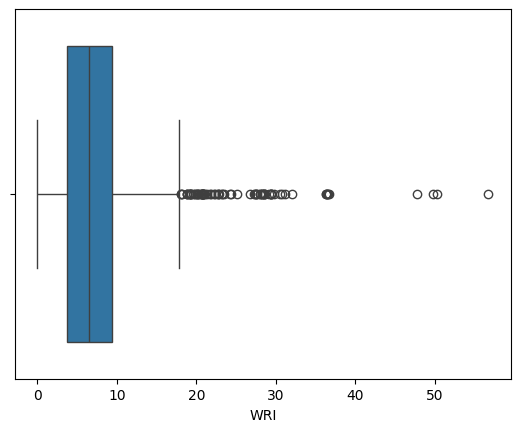

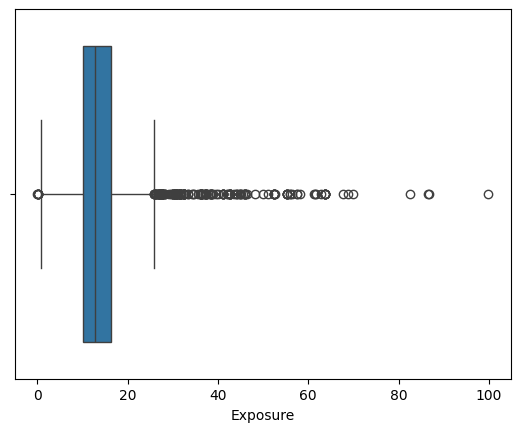

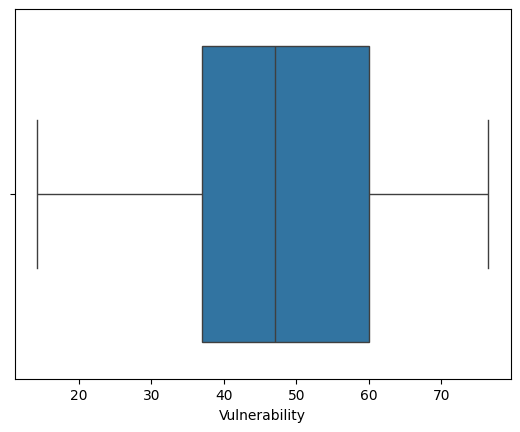

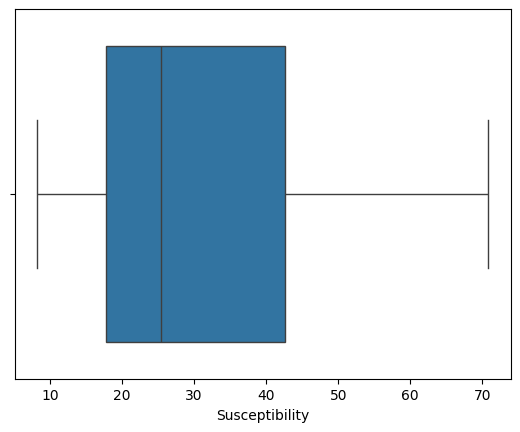

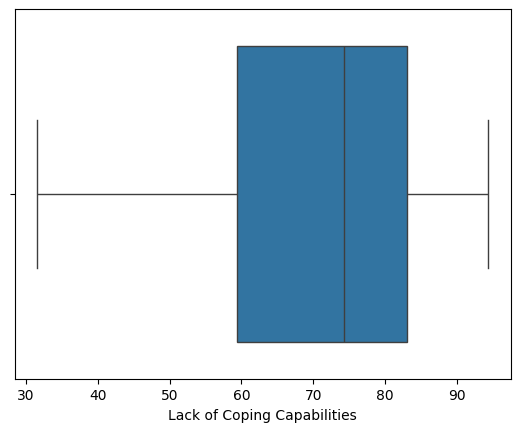

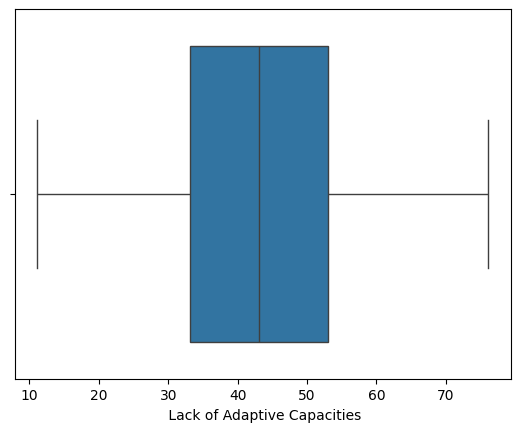

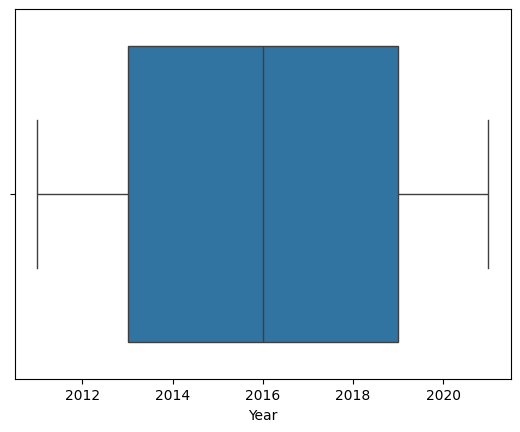

In [11]:
for i in df.select_dtypes(include='number'):
    sns.boxplot(data=df,x=i)
    plt.show()  

Scatterplot tells about how diffrents values  in dataset values related to WRI(World_Risk_Index) values

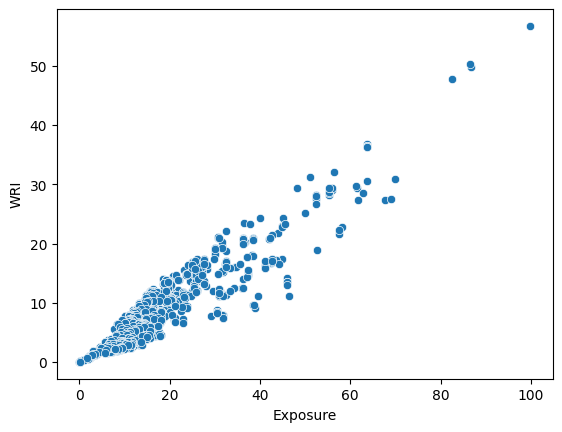

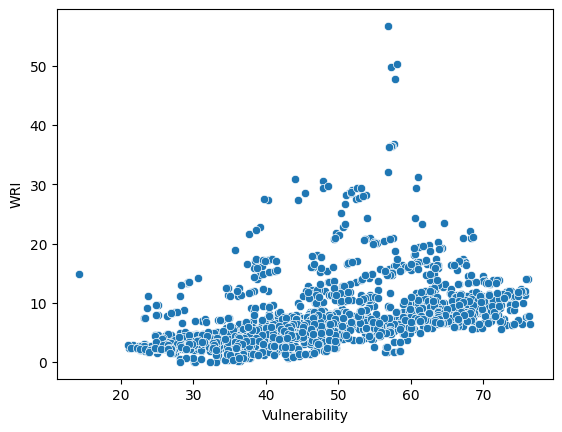

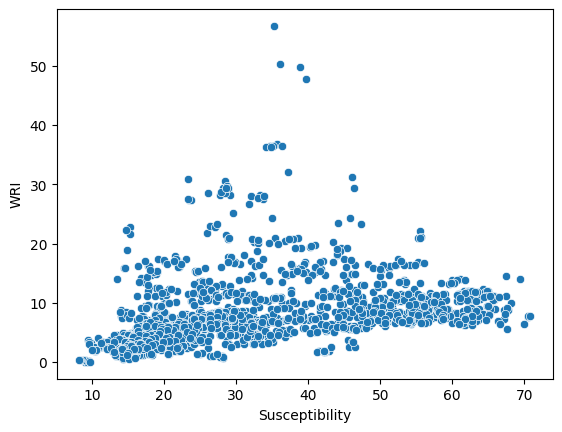

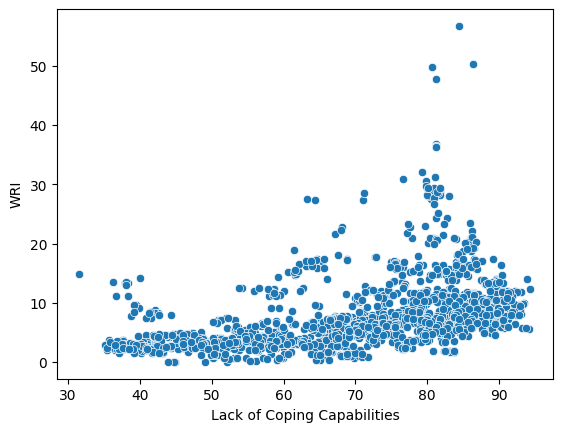

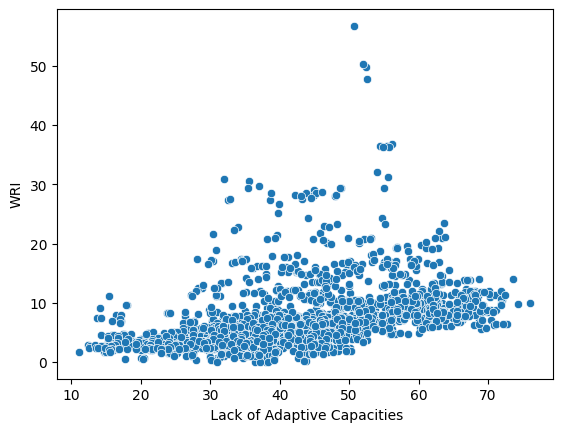

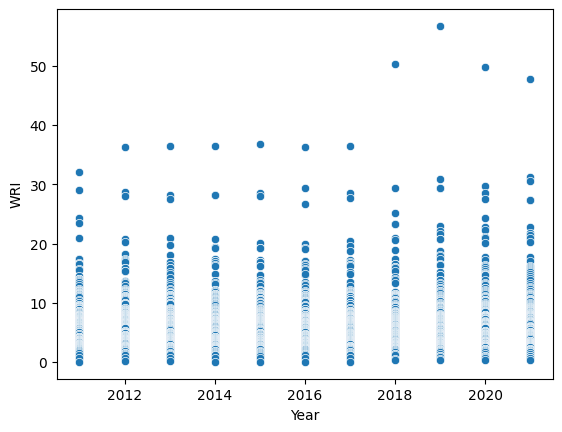

In [12]:
for i in [ 'Exposure', 'Vulnerability', 'Susceptibility',
       'Lack of Coping Capabilities', ' Lack of Adaptive Capacities', 'Year']:
    sns.scatterplot(data=df,x=i,y='WRI')
    plt.show()

This graphs tells co relation between diffrent features with respect to each othe.

<Axes: >

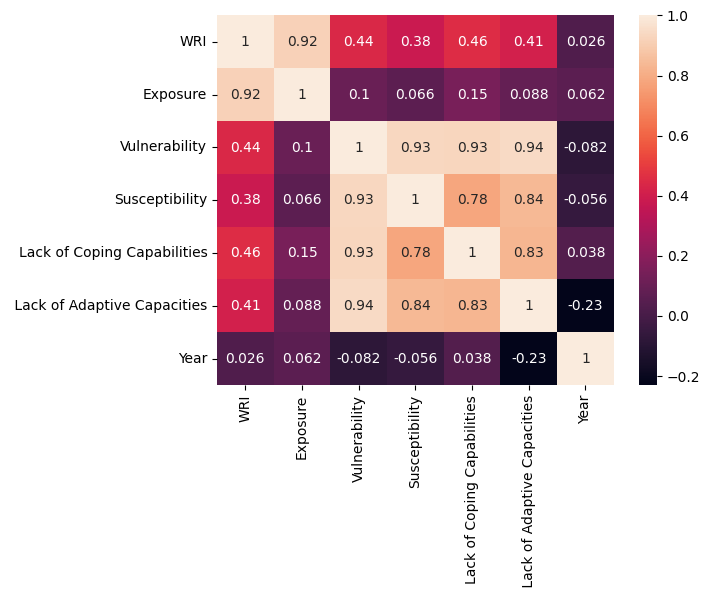

In [13]:
corr = df.select_dtypes(include='number').corr()
sns.heatmap(corr,annot=True,)

# This graph tells about the probability of WRI to be that value

C:\Users\shivang\AppData\Local\Temp\ipykernel_23688\2334973645.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['WRI'],color='r')


<Axes: xlabel='WRI', ylabel='Density'>

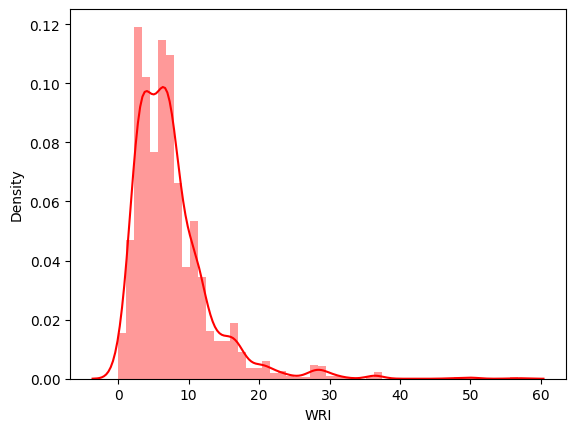

In [14]:
sns.distplot(df['WRI'],color='r')

In [15]:
df.sample(5)

,Region,WRI,Exposure,Vulnerability,Susceptibility,Lack of Coping Capabilities,Lack of Adaptive Capacities,Year,Exposure Category,WRI Category,Vulnerability Category,Susceptibility Category
783,Namibia,5.86,11.30,51.89,42.89,74.11,38.66,2021,Low,Medium,High,High
404,Sambia,7.55,11.37,66.46,62.29,79.97,57.11,2015,Low,High,Very High,Very High
587,Greece,7.10,21.11,33.62,17.76,51.21,31.89,2014,Very High,Medium,Very Low,Low
1319,Kuba,5.84,16.53,35.34,19.48,53.67,32.86,2020,High,Medium,Low,Low
1728,Deutschland,2.42,11.31,21.36,15.09,35.38,13.60,2018,Low,Very Low,Very Low,Very Low


<Axes: xlabel='Vulnerability', ylabel='Lack of Coping Capabilities'>

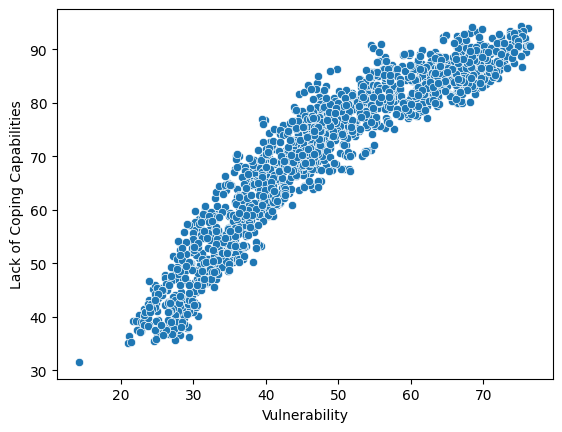

In [16]:
sns.scatterplot(data=df,x='Vulnerability',y='Lack of Coping Capabilities')

# This graphs tells the non linear relation b/w the Exposure and vulnerability.
that if the Exposure value is low but still the  vulnerability of country is high.

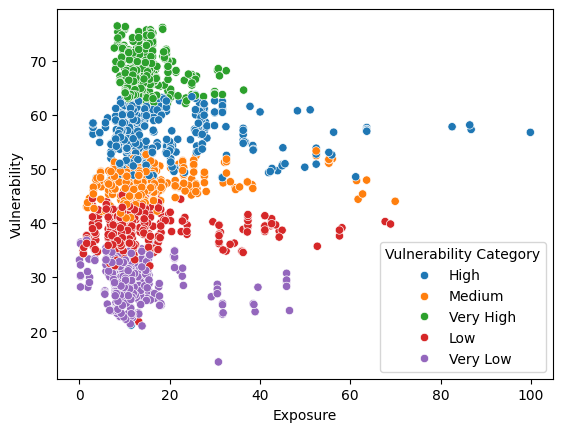

In [17]:
sns.scatterplot(data=df,x='Exposure',y='Vulnerability',hue='Vulnerability Category')
plt.show()

This graphs tells about how the WRI increasing rate per year.

<Axes: xlabel='Year', ylabel='WRI'>

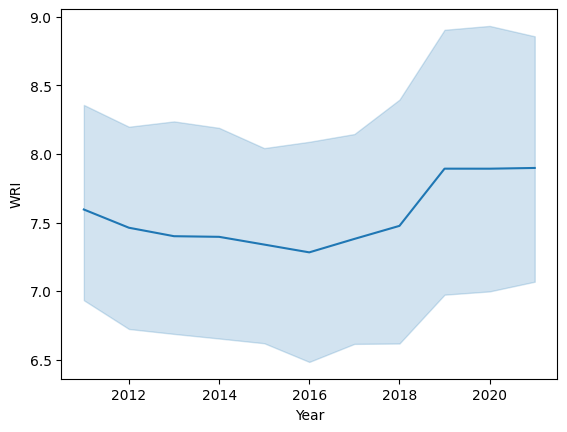

In [18]:
sns.lineplot(data=df,x='Year',y='WRI')

Pairplot gives  the bird eye view of all numeical features relations to each other in datset with respect to WRI Exposure

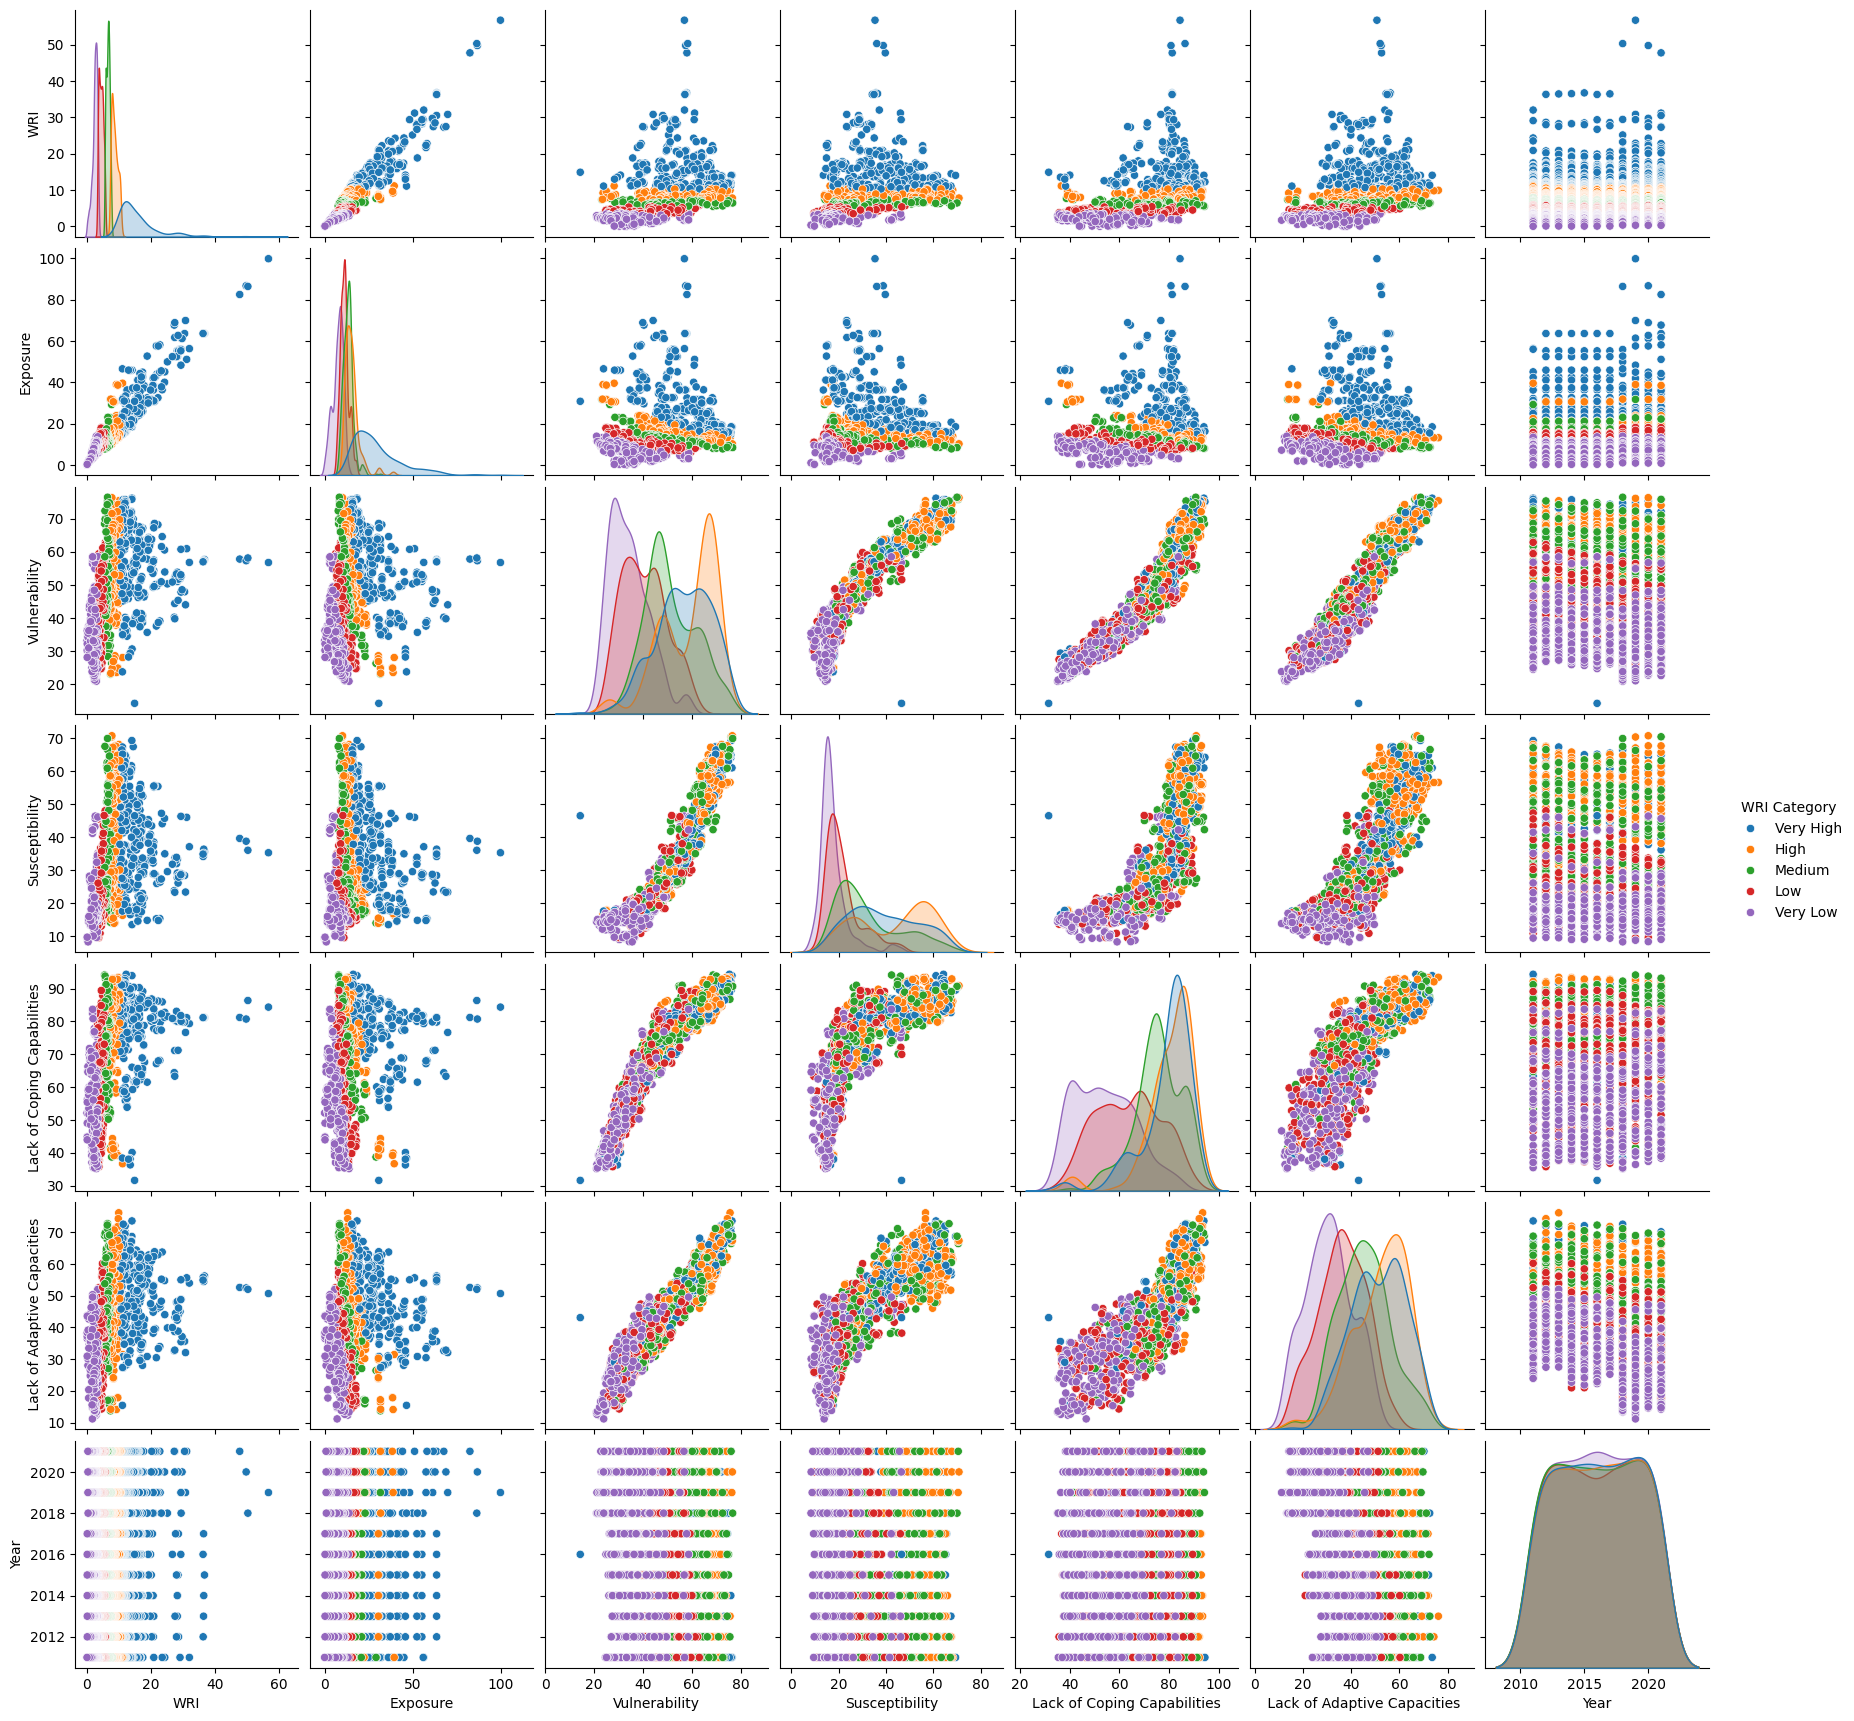

In [19]:
sns.pairplot(data=df,hue='WRI Category')

<Axes: xlabel='WRI Category', ylabel='WRI'>

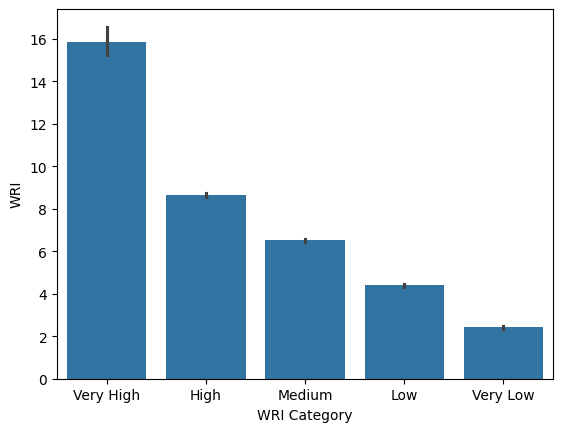

In [20]:
sns.barplot(data=df,x='WRI Category',y='WRI')

Below graph tells about the realtion between the WRI and Exposure values with respect to WRI category. In graph it is clear that if Exposure value on data is low then the WRI value is also low and the WRI Category is also mentioned very low. but on the other hand if the Exposure value is high then the WRI value is also high. its tell how these value are strongly related to each other.

<Axes: xlabel='WRI', ylabel='Exposure'>

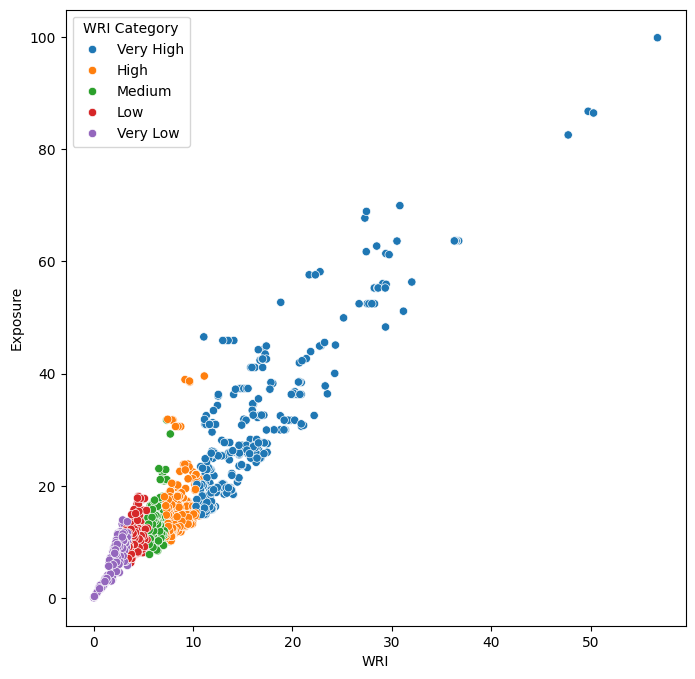

In [21]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=df,x='WRI',y='Exposure',hue='WRI Category')